# Mode imputation (Most Frequent)

Yet another technique is mode imputation in which the missing values are replaced with the mode value or most frequent value of the entire feature column. When the data is skewed, it is good to consider using mode values for replacing the missing values.

## When to use mode?
* You can use this method when data is missing completely at random, and no more than 5% of the variable contains missing data.
* Your mode category should be most greater than other categories of the feature.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('/home/saad/Downloads/train.csv' ,usecols=['FireplaceQu','GarageQual','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [3]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

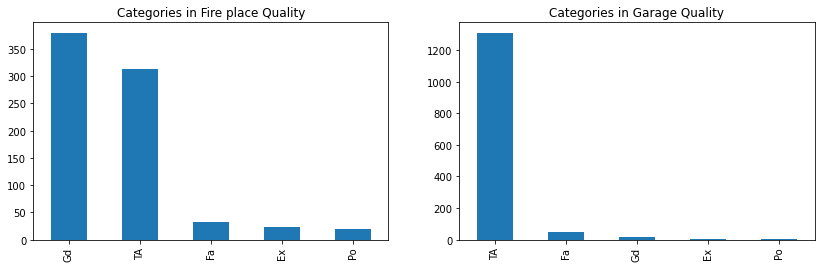

In [4]:
plt.figure(figsize=(14,4))
plt.subplot(121)
df['FireplaceQu'].value_counts().plot(kind='bar')
plt.title("Categories in Fire place Quality")
plt.subplot(122)
df['GarageQual'].value_counts().plot(kind='bar')
plt.title("Categories in Garage Quality")
plt.show()

In [5]:
print("Most frequent category in Fire place Qulity is: ",df['FireplaceQu'].mode().values)
print()
print()
print("Most frequent category in Garage Quality is:  ",df['GarageQual'].mode().values)

Most frequent category in Fire place Qulity is:  ['Gd']


Most frequent category in Garage Quality is:   ['TA']


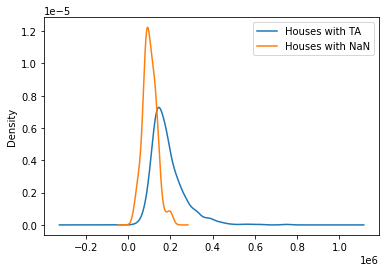

In [6]:
# replace the nan values with most frequent category
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde')

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA','Houses with NaN']
ax.legend(lines, labels, loc='best')

In [7]:
temp = df[df['GarageQual']=='TA']['SalePrice'] # where all the categories are TA in GarageQual

In [8]:
df['GarageQual'].fillna('TA', inplace=True)

<AxesSubplot:>

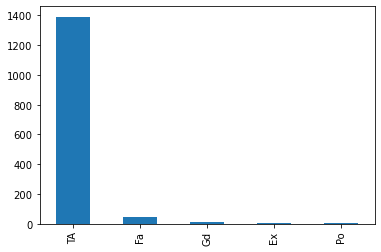

In [9]:
df['GarageQual'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'GarageQual')

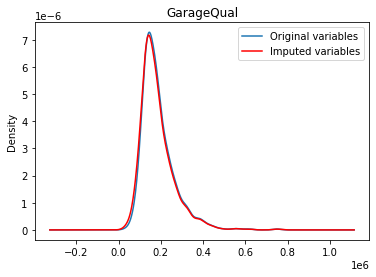

In [10]:
# replace the nan values with most frequent category
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde')

# distribution of the variable after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax, color='r')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variables','Imputed variables']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

Text(0.5, 1.0, 'Before Imputation')

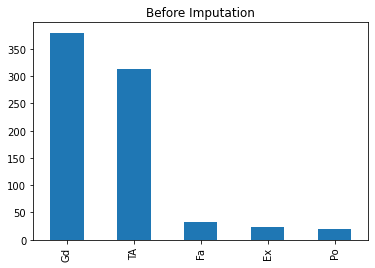

In [11]:
df['FireplaceQu'].value_counts().plot(kind='bar')
plt.title("Before Imputation")

Text(0.5, 1.0, 'FireplaceQu')

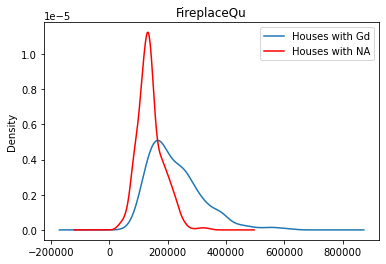

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [13]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [14]:
df['FireplaceQu'].fillna('Gd', inplace=True)

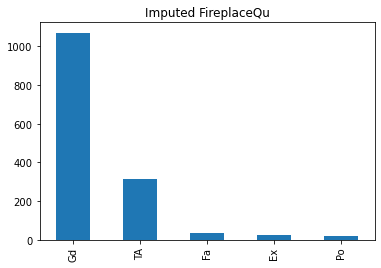

In [15]:
# distribution of the variable after imputation
df['FireplaceQu'].value_counts().plot(kind='bar')
plt.title('Imputed FireplaceQu')
plt.show()

Text(0.5, 1.0, 'FireplaceQu')

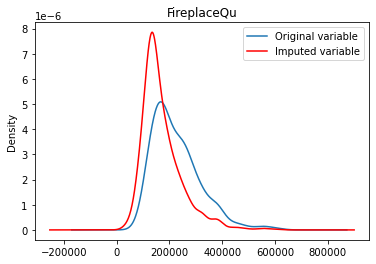

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='r')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imputer = SimpleImputer(strategy='most_frequent')

In [20]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

In [21]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)